In [54]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns;

In [55]:
# Reading the dataset
df_titanic = pd.read_csv("titanic.csv")

In [56]:
# Checking the data
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
# Checking non-null values in the dataset
df_titanic.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [58]:
# Checking null values in the dataset
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
# Dropping the "Cabin" column as it has a lot of null values, so fixing it can affect the original results
df_titanic.drop('Cabin', axis=1, inplace=True)

In [60]:
# Checking if the "Cabin" column is dropped
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Fixing the null values in the "Age" column

#### In order to tackle with the null values in the "Age" column, we will be calculating the mean of the non-null values and replacing the calculated mean with the null values present under the column.

<AxesSubplot:xlabel='Age'>

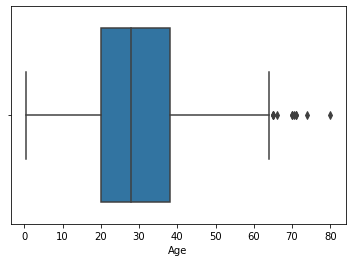

In [61]:
# Looking at the "Age" column by plotting a boxplot to know the mean in order to fix the null values
sns.boxplot(x='Age',data=df_titanic)

In [62]:
# Calculating the mean value of "Age" column and rounding off to the highest degree
means = round(df_titanic['Age'].mean())
means

30

In [63]:
# Replacing the calculated meand with the null values in the Age column and verifying the dataset
df_titanic['Age'] = df_titanic['Age'].fillna(means)
df_titanic['Age'].isnull().sum()

0

In [64]:
# Verifying the dataset information to check if the nulls have beed replaced
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Hypothesis 1: Determine if the survival rate is associated to the class of passenger

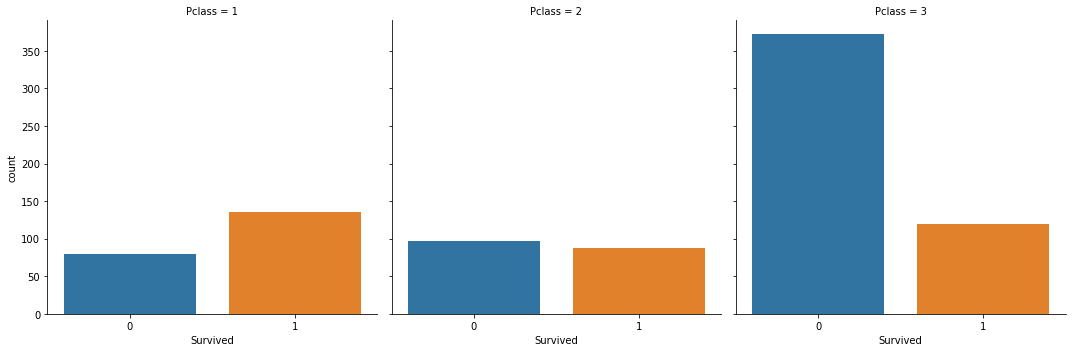

In [65]:
# Making a plot to check the relationship between survival rate and passenger class
sns.catplot(data=df_titanic, x='Survived',col='Pclass',kind='count')

### Hypothesis 2: Determine if the survival rate is associated to the gender

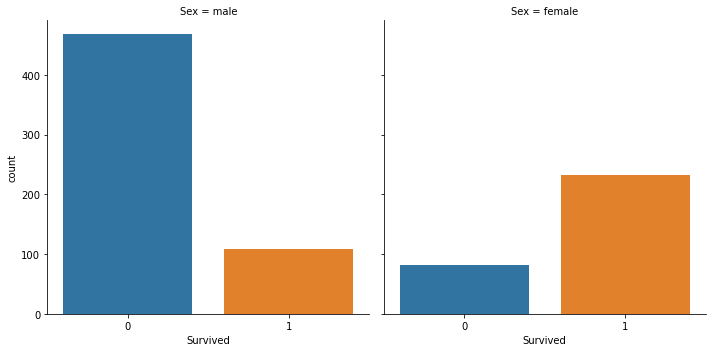

In [66]:
# Making a plot to check the relationship between survival rate and sex
sns.catplot(data=df_titanic, x='Survived',col='Sex',kind='count')

### Hypothesis 3: Determine the survival rate is associated to the age

#### In order to test this theory, we will be dividing the passengers into three groups depending on their ages: "Youth," "Adult," and "Senior Citizen" and then carrying out the hypothesis

In [67]:
# Grouping the "Age" based on the custom category - "Youth", "Adult" & "Senior Citizen"
def age(year):
    if year >=0 and year <=14:
        return 'Children'
    elif year >=15 and year <=24:
        return 'Youth'
    elif year >=25 and year <=60:
        return 'Adult'
    else:
        return 'Senior Citizen'

df_titanic['Age_Group'] = df_titanic['Age'].apply(age)

In [68]:
# Verifying if the "Age_Group" column has been created in the dataframe
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  Age_Group    891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


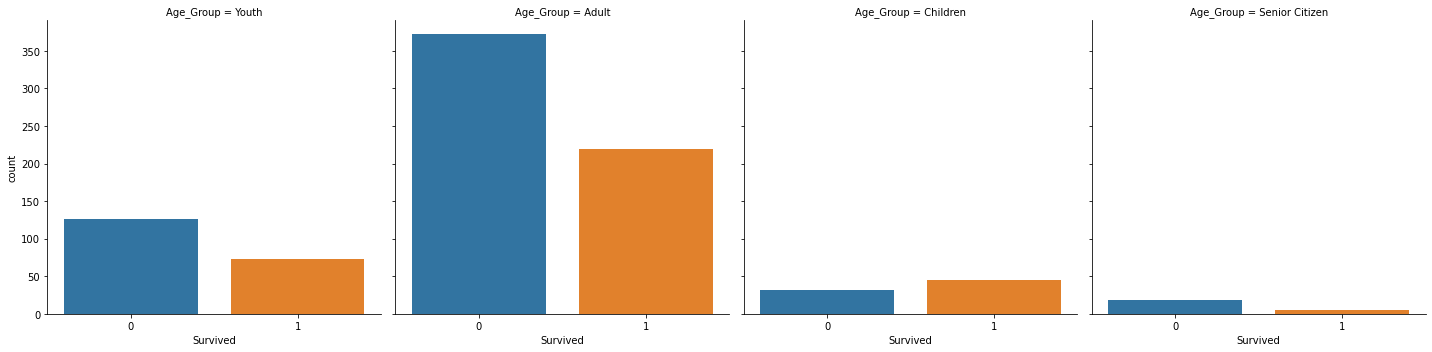

In [69]:
# Making a plot to check the relationship between survival rate and age
sns.catplot(data=df_titanic, x='Survived',col='Age_Group',kind='count' )